In [1]:
import keras
import numpy as np

Using TensorFlow backend.


## Load the models from keras applications folder

In [2]:
from keras.applications import inception_v3

inception_model = inception_v3.InceptionV3(weights='imagenet')

## Import the required image preprocessing functions

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
filename = 'images/yml_drill.jpg'

## Perform Pre-processing before feeding the image to the network

PIL image size (224, 224)


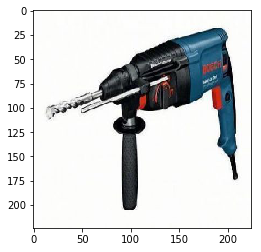

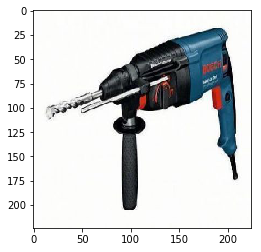

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


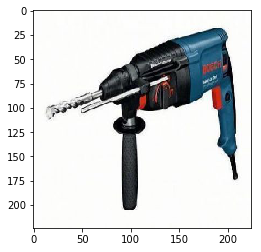

In [5]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

## Predictions using the various Network

## Inception_V3 Network

In [6]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
#label_inception
label_inception

[[('n03995372', 'power_drill', 0.96634233),
  ('n02966687', "carpenter's_kit", 0.00069126469),
  ('n03481172', 'hammer', 0.00066151336),
  ('n04154565', 'screwdriver', 0.00056497368),
  ('n03483316', 'hand_blower', 0.00037381961)]]